In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/video-game-stocks-financial-market-data/Top10VideoGameStocks.csv


Data Loading and Overview

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = '/kaggle/input/video-game-stocks-financial-market-data/Top10VideoGameStocks.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,Date,Company,Ticker Symbol,Currency,Open,High,Low,Close,Adj Close,Volume
0,2000-01-01,Sony Interactive Entertainment,SONY,JPY,28.525000,29.168751,20.850000,25.299999,14.535083,147012000
1,2000-02-01,Sony Interactive Entertainment,SONY,JPY,25.293751,31.475000,25.000000,31.350000,18.010864,67437000
2,2000-03-01,Sony Interactive Entertainment,SONY,JPY,30.100000,31.299999,21.700001,28.012501,16.093437,112674000
3,2000-04-01,Sony Interactive Entertainment,SONY,JPY,28.250000,28.250000,22.312500,22.562500,12.974537,74071000
4,2000-05-01,Sony Interactive Entertainment,SONY,JPY,22.700001,23.481251,17.750000,18.237499,10.487453,65035500


Data Preprocessing

In [3]:
# Convert 'Date' to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Fill missing values (if any)
df['Close'].fillna(method='ffill', inplace=True)
df['Volume'].fillna(method='ffill', inplace=True)

Date             0
Company          0
Ticker Symbol    0
Currency         0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
dtype: int64


Exploratory Data Analysis (EDA)

> Descriptive Statistics

In [4]:
# Descriptive statistics
df.describe()


,Date,Open,High,Low,Close,Adj Close,Volume
count,2209,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2.209000e+03
mean,2013-06-10 08:01:05.187867904,56.082332,60.403246,52.123886,56.452762,54.255817,2.677228e+08
min,2000-01-01 00:00:00,0.032000,0.032000,0.025500,0.032000,0.025868,0.000000e+00
25%,2007-04-01 00:00:00,8.374000,9.225000,7.520000,8.380000,7.123526,3.879940e+07
50%,2013-11-01 00:00:00,22.362000,24.500000,20.070000,22.379999,18.641869,8.711250e+07
75%,2019-12-01 00:00:00,57.276001,61.731998,53.959999,57.459999,55.368843,3.528646e+08
max,2024-10-01 00:00:00,643.455811,714.899658,610.729919,628.245178,613.602234,3.044579e+09
std,NaN,88.552277,95.086684,82.698684,88.816897,87.529546,4.027909e+08


> Visualizing Stock Prices

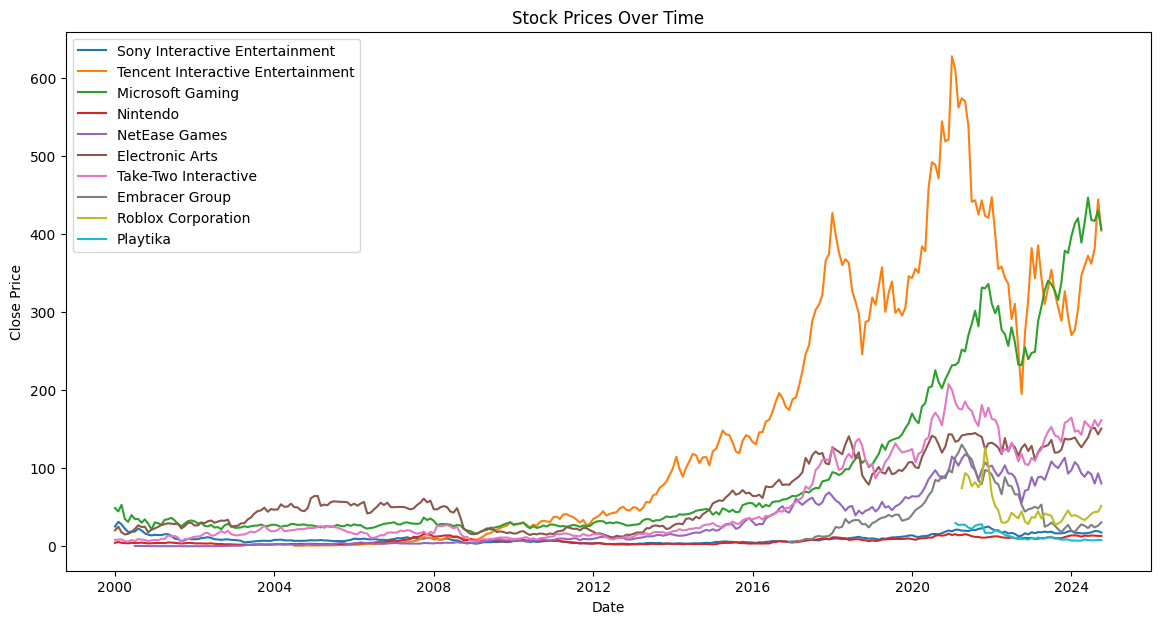

In [5]:
# Plot stock prices over time
plt.figure(figsize=(14, 7))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Close'], label=company)
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


> Volume Analysis

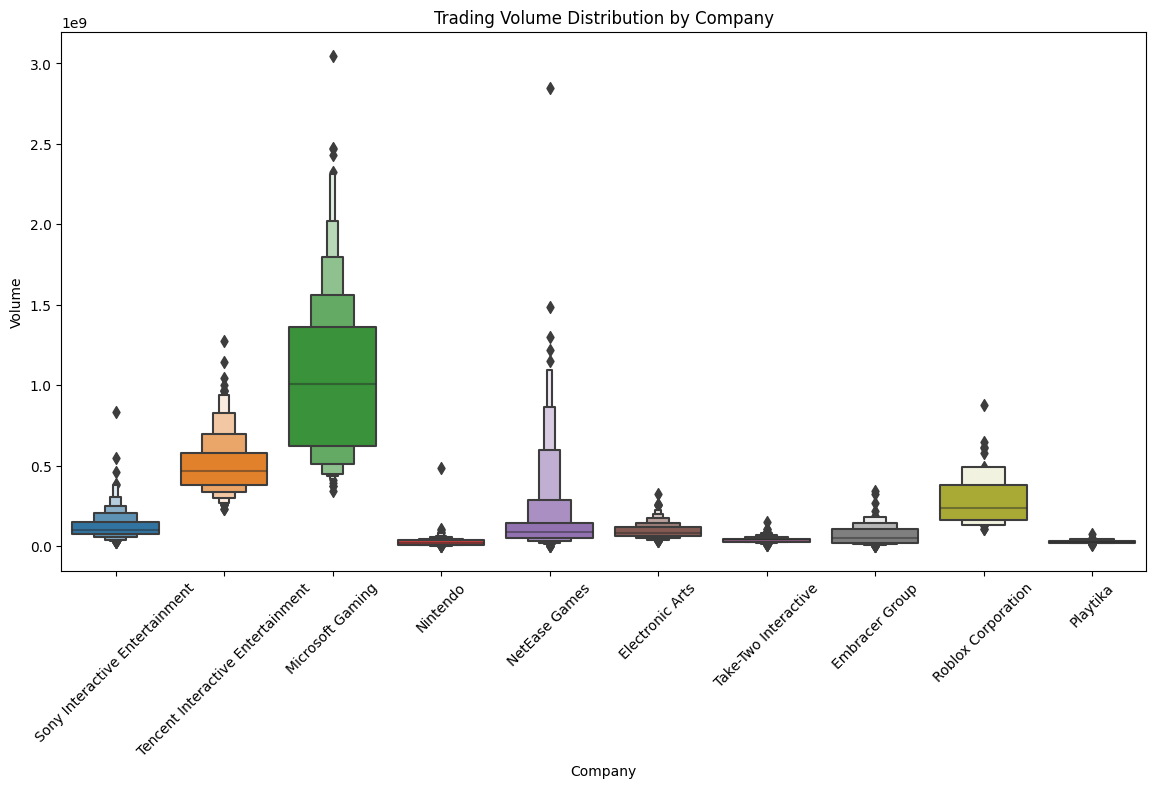

In [6]:
# Plot trading volume distribution by company
plt.figure(figsize=(14, 7))
sns.boxenplot(x='Company', y='Volume', data=df)
plt.title('Trading Volume Distribution by Company')
plt.xticks(rotation=45)
plt.show()

Correlation Analysis

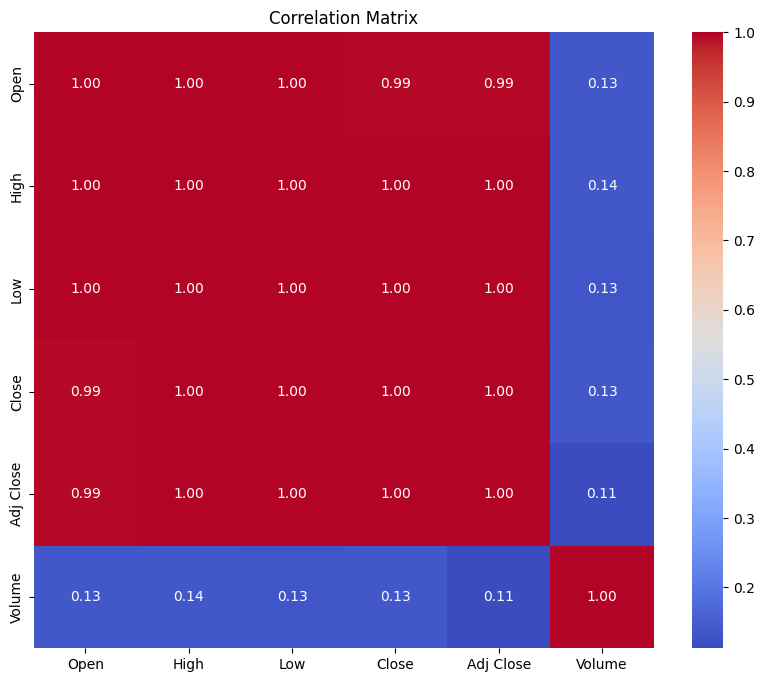

In [7]:
# Select numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


Predictive Modeling (for Seasonal Trend Analysis)

>  Model Training

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare the data
df['Month'] = df['Date'].dt.month
X = df[['Open', 'High', 'Low', 'Volume', 'Month']]  # Adding Month as a feature for seasonality
y = df['Close']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

> Model Evaluation

In [9]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 15.547637684208384


> Plot Prediksi vs Aktual (Scatter Plot)

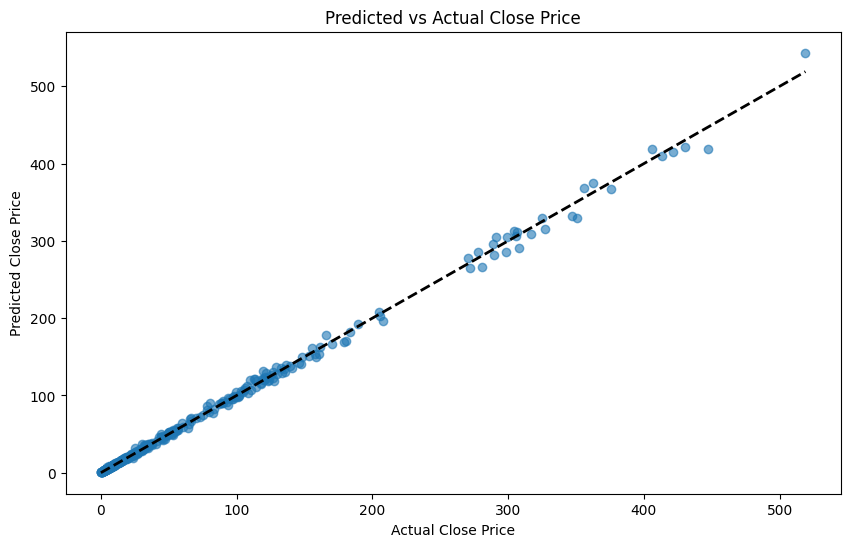

In [10]:
# Plotting Predicted vs Actual (Scatter Plot)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Close Price')
plt.ylabel('Predicted Close Price')
plt.title('Predicted vs Actual Close Price')
plt.show()


> Visualization of Seasonal Trends by Company

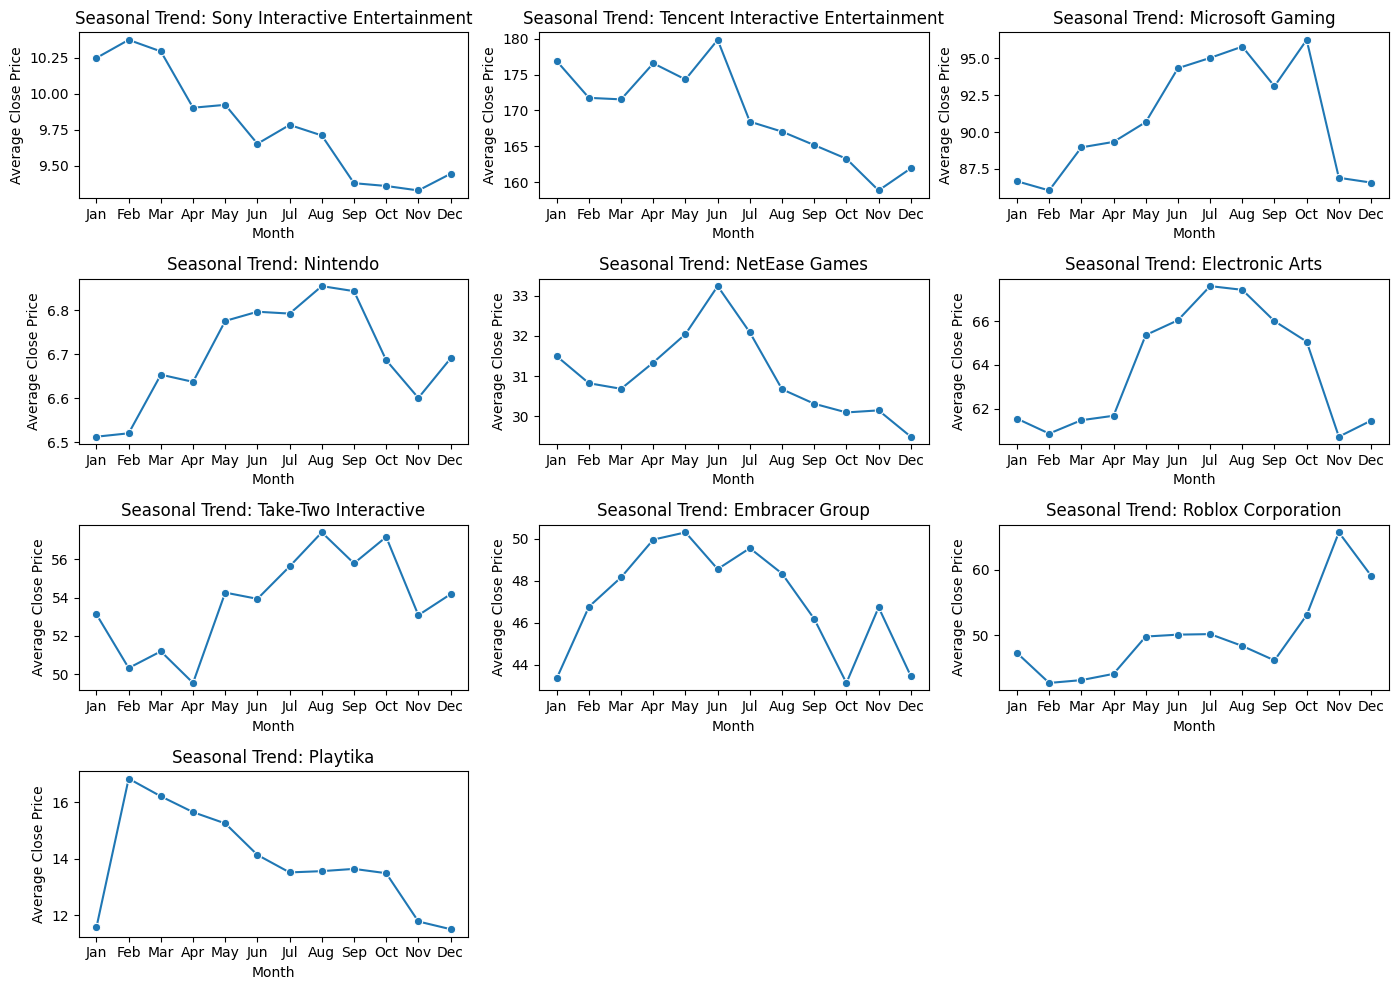

Companies included in seasonal trend analysis: ['Sony Interactive Entertainment' 'Tencent Interactive Entertainment'
 'Microsoft Gaming' 'Nintendo' 'NetEase Games' 'Electronic Arts'
 'Take-Two Interactive' 'Embracer Group' 'Roblox Corporation' 'Playtika']


In [11]:
# Group by month and calculate mean close price for each company
plt.figure(figsize=(14, 10))

# Iterate over each company and plot its seasonal trend
for i, company in enumerate(df['Company'].unique(), 1):
    company_data = df[df['Company'] == company]
    seasonal_trend = company_data.groupby('Month')['Close'].mean()
    
    # Create a subplot for each company
    plt.subplot(4, 3, i)  # Assuming we have a 4x3 grid (adjust if needed)
    sns.lineplot(x=seasonal_trend.index, y=seasonal_trend.values, marker='o')
    plt.title(f'Seasonal Trend: {company}')
    plt.xlabel('Month')
    plt.ylabel('Average Close Price')
    plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Adjust layout for better readability
plt.tight_layout()
plt.show()

# Checking which companies are included in the seasonal trend analysis
print(f"Companies included in seasonal trend analysis: {df['Company'].unique()}")


> Visualizing Seasonal Trends

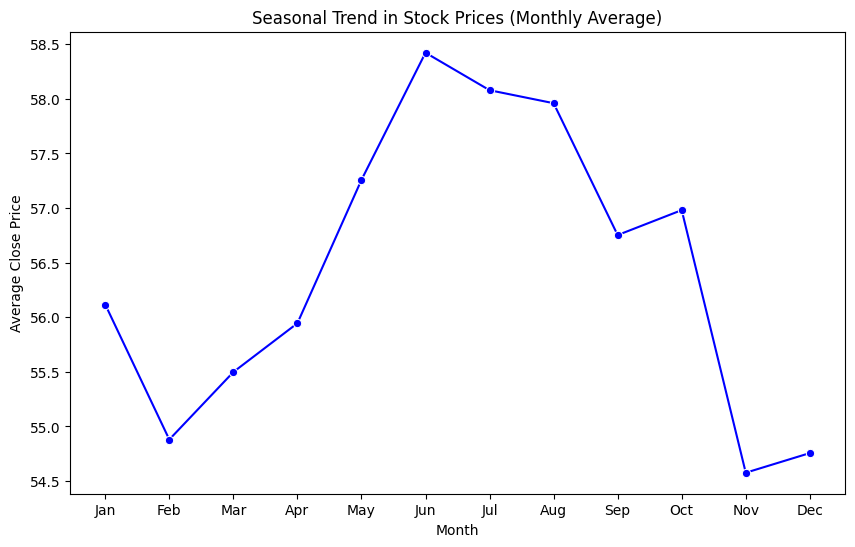

In [12]:
# Group by month and calculate mean close price
seasonal_trend = df.groupby('Month')['Close'].mean()

# Plot the seasonal trend
plt.figure(figsize=(10, 6))
sns.lineplot(x=seasonal_trend.index, y=seasonal_trend.values, marker='o', color='b')
plt.title('Seasonal Trend in Stock Prices (Monthly Average)')
plt.xlabel('Month')
plt.ylabel('Average Close Price')
plt.xticks(np.arange(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()
